# Final Project Submission

* Lauren Petrillo
* Part Time
* Scheduled project review date/time: 8/30/21 @ 4:30pm
* Claude Fried
* Blog post URL:https://medium.com/@lauren.petrillo13/finding-the-correlation-of-genres-f0686887cd47



## Business Problem

I was tasked to create a new movie studio for Microsoft by giving three business recommendations to the Stakeholders. I do this by analyzing data in the movie industry to generate actionable insights in order to become a successful movie studio. I want to explore the highest grossing genres, directors, and studios.

## Importing Data

Import Necessary Information to start project


In [1]:
#import necessary information to start the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
os.listdir('zippedData')

['bom.movie_gross.csv.gz',
 'imdb.name.basics.csv.gz',
 'imdb.title.akas.csv.gz',
 'imdb.title.basics.csv.gz',
 'imdb.title.crew.csv.gz',
 'imdb.title.principals.csv.gz',
 'imdb.title.ratings.csv.gz',
 'rt.movie_info.tsv.gz',
 'rt.reviews.tsv.gz',
 'tmdb.movies.csv.gz',
 'tn.movie_budgets.csv.gz']

## Questions to Explore

1. What are the highest grossing genres? 
2. What are the highest grossing studios
3. Who are the highest grossing directors?

# Gathering/Cleaning Data

## Movie Gross

In [2]:
#create a df for bom.movie_gross.csv.gz dataset to gather worldwide gross, titles, and studios
df=pd.read_csv('zippedData/bom.movie_gross.csv.gz')

In [3]:
df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [4]:
df.head(5)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
#transform domestic_gross and foreign_gross data types to float values
df[['domestic_gross', 'foreign_gross']] = df[
    ['domestic_gross', 'foreign_gross']].apply(pd.to_numeric, errors='coerce')

In [6]:
#double-checking that the above column values are floats and not objects
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2032 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [7]:
#detect any missing values
df.isna()

,title,studio,domestic_gross,foreign_gross,year
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
3382,False,False,False,True,False
3383,False,False,False,True,False
3384,False,False,False,True,False
3385,False,False,False,True,False


In [8]:
#detect sum of missing values
df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1355
year                 0
dtype: int64

Dropped about 1400 rows of data

In [9]:
#dropping the duplicates
df.dropna(inplace=True)

In [10]:
df.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

## Movie Titles

In [11]:
#create df for imdb.title.basics.csv.gz to get the tconst, titles, and genres
df1=pd.read_csv('zippedData/imdb.title.basics.csv.gz')
df1.head()
df1.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

In [12]:
df1

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [14]:
#drop runtime_minutes since it has a lot of missing values that we will not use for the data set
df1 = df1.drop(['runtime_minutes'], axis=1)

In [15]:
#dropping the missing values
df1 = df1.dropna()

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140734 entries, 0 to 146143
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   tconst          140734 non-null  object
 1   primary_title   140734 non-null  object
 2   original_title  140734 non-null  object
 3   start_year      140734 non-null  int64 
 4   genres          140734 non-null  object
dtypes: int64(1), object(4)
memory usage: 6.4+ MB


In [17]:
#check for duplicates in the tconst column
df1.drop_duplicates(subset='tconst', inplace=True)
df1.reset_index(drop=True, inplace=True)

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140734 entries, 0 to 140733
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   tconst          140734 non-null  object
 1   primary_title   140734 non-null  object
 2   original_title  140734 non-null  object
 3   start_year      140734 non-null  int64 
 4   genres          140734 non-null  object
dtypes: int64(1), object(4)
memory usage: 5.4+ MB


## Movie Ratings

In [19]:
#create df for imdb.title.ratings.csv.gz to access tconst and average rating
df2=pd.read_csv('zippedData/imdb.title.ratings.csv.gz')

In [20]:
df2.columns

Index(['tconst', 'averagerating', 'numvotes'], dtype='object')

In [21]:
df2.head(20)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326
6,tt1094666,7.0,1613
7,tt1130982,6.4,571
8,tt1156528,7.2,265
9,tt1161457,4.2,148


In [22]:
#check the sum for the missing values
df2.isna().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

In [23]:
#check duplicates for tconst
df2.drop_duplicates(subset='tconst', inplace=True)

In [24]:
df2.reset_index(drop=True, inplace=True)

In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


## Joining Titles & Ratings

In [26]:
#joining the two dataframes to merge the genres and average ratings together
df3 = df1.set_index('tconst').join(df2.set_index('tconst'), how='inner')

In [27]:
df3.head(200)

,primary_title,original_title,start_year,genres,averagerating,numvotes
tconst,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"Biography,Drama",7.2,43
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,Drama,6.9,4517
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,"Comedy,Drama",6.1,13
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...
tt0496375,Prisoners of the Sun,Prisoners of the Sun,2013,"Action,Adventure,Horror",3.7,1106
tt0498351,The Hero of Color City,The Hero of Color City,2014,"Animation,Family",4.0,431
tt0498381,Rings,Rings,2017,"Drama,Horror,Mystery",4.5,34151


In [28]:
df3.isna().sum()

primary_title     0
original_title    0
start_year        0
genres            0
averagerating     0
numvotes          0
dtype: int64

# Genre Ratings vs. Genre Worldwide Gross

In [29]:
#joining the previous dataframe to this one to include the domestic and foreign gross
df4 = df3.set_index('primary_title').join(df.set_index('title'), how='inner').reset_index()

In [30]:
df4.head()

,index,original_title,start_year,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,'71,'71,2014,"Action,Drama,Thriller",7.2,46103,RAtt.,1300000.0,355000.0,2015
1,10 Cloverfield Lane,10 Cloverfield Lane,2016,"Drama,Horror,Mystery",7.2,260383,Par.,72100000.0,38100000.0,2016
2,102 Not Out,102 Not Out,2018,"Comedy,Drama",7.5,4802,Sony,1300000.0,10900000.0,2018
3,11-11-11,11-11-11,2011,"Horror,Mystery,Thriller",4.0,11712,Rocket,32800.0,5700000.0,2011
4,12 Strong,12 Strong,2018,"Action,Drama,History",6.6,50155,WB,45800000.0,21600000.0,2018


In [31]:
#lambda function to separate the strings in the genres column
genres = df4['genres'].apply(lambda g: g.split(',')).apply(lambda x: {A:1 for A in x}).values

In [32]:
#fill in the missing values
genres_df = pd.DataFrame(list(genres)).fillna(0)

In [33]:
genres_df

,Action,Drama,Thriller,Horror,Mystery,Comedy,History,Biography,Adventure,Romance,...,Music,Fantasy,Animation,Western,War,Sci-Fi,Family,Musical,Sport,News
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1795,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1796,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1797,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
#using concat function to combine text from multiple strings
updated_genres_df = pd.concat([genres_df, df4], axis=1)

In [35]:
#creating a new column to add the domestic and foreign gross together to equal the total gross


updated_genres_df['total_gross'] = updated_genres_df['domestic_gross'] + updated_genres_df['foreign_gross']



In [36]:
#testing the Action genre to see if we can get the average rating
updated_genres_df[updated_genres_df['Action'] == 1]['averagerating'].mean()

6.38891304347826

In [37]:
#creating x and y values to plot


x_values = genres_df.columns
y_values = []
for x in x_values:
    y_values.append(updated_genres_df[updated_genres_df[x] == 1]['averagerating'].mean())
    
    
#the for loop for the y value goes into the x value to extract the genre and run that through the loop to get the average rating

In [38]:
#making an ascending variable so the graph will show the highest to lowest
genres_asc = pd.DataFrame([x_values, y_values]).T
genres_asc.sort_values(1, inplace=True)
genres_asc

,0,1
3,Horror,5.77987
18,Family,6.11163
13,Fantasy,6.20775
4,Mystery,6.23008
2,Thriller,6.2331
5,Comedy,6.27798
19,Musical,6.28
9,Romance,6.37059
0,Action,6.38891
21,News,6.4


In [39]:
updated_genres_df

,Action,Drama,Thriller,Horror,Mystery,Comedy,History,Biography,Adventure,Romance,...,original_title,start_year,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,total_gross
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,'71,2014,"Action,Drama,Thriller",7.2,46103,RAtt.,1300000.0,355000.0,2015,1.655000e+06
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,10 Cloverfield Lane,2016,"Drama,Horror,Mystery",7.2,260383,Par.,72100000.0,38100000.0,2016,1.102000e+08
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,102 Not Out,2018,"Comedy,Drama",7.5,4802,Sony,1300000.0,10900000.0,2018,1.220000e+07
3,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,11-11-11,2011,"Horror,Mystery,Thriller",4.0,11712,Rocket,32800.0,5700000.0,2011,5.732800e+06
4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,12 Strong,2018,"Action,Drama,History",6.6,50155,WB,45800000.0,21600000.0,2018,6.740000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,Yves Saint Laurent,2014,"Biography,Drama",6.2,10311,Wein.,724000.0,20300000.0,2014,2.102400e+07
1795,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Zero Dark Thirty,2012,"Drama,Thriller",7.4,251072,Sony,95700000.0,37100000.0,2012,1.328000e+08
1796,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,Zookeeper,2011,"Comedy,Family,Romance",5.2,52396,Sony,80400000.0,89500000.0,2011,1.699000e+08
1797,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,Zoolander 2,2016,Comedy,4.7,59914,Par.,28800000.0,27900000.0,2016,5.670000e+07


Text(0.5, 1.0, 'Genre Average Movie Ratings')

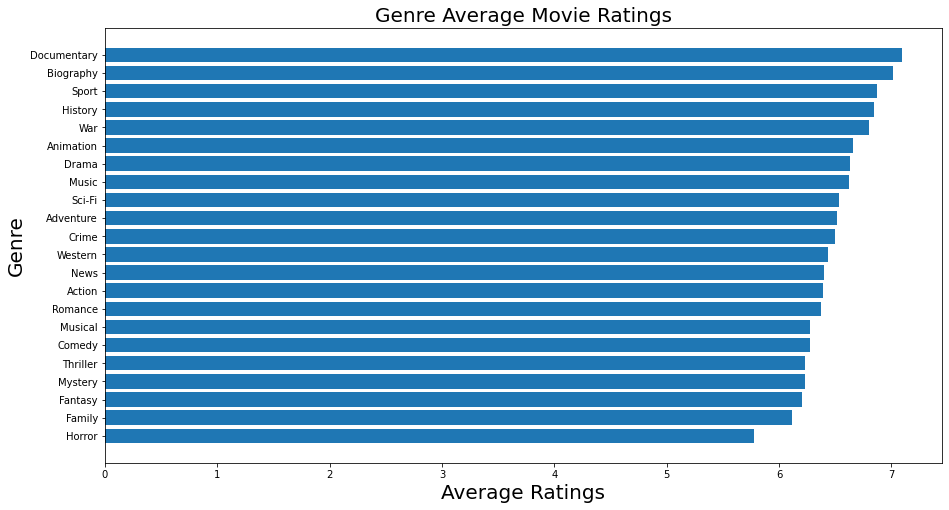

In [40]:
y_pos = len(x_values)
plt.figure(figsize = (15,8))
plt.barh(genres_asc[0], genres_asc[1])
plt.ylabel('Genre', fontsize = 20)
plt.xlabel('Average Ratings', fontsize = 20)
plt.title('Genre Average Movie Ratings', fontsize=20)

As you can see from the above graph, the highest rated movie genres are Documentary, Biography, and Sport.

In [41]:
#fetching the total gross value
updated_genres_df = updated_genres_df[updated_genres_df['total_gross'] !=0]
updated_genres_df['total_gross'] = updated_genres_df['total_gross']

In [42]:
#creating the x and y values to plot, created for loop for y value to extract the total gross

x_values = genres_df.columns
y_values = []
for x in x_values:
    y_values.append(updated_genres_df[updated_genres_df[x] == 1]['total_gross'].mean())
    
    

In [43]:
#sorting the values from highest to lowest
genres_asc_rev = pd.DataFrame([x_values, y_values]).T
genres_asc_rev.sort_values(1, inplace=True)
genres_asc_rev

,0,1
16,War,3.86008e+07
9,Romance,6.12886e+07
21,News,6.46e+07
6,History,6.9396e+07
11,Documentary,6.99823e+07
1,Drama,7.06703e+07
12,Music,7.14071e+07
10,Crime,7.66601e+07
7,Biography,7.9938e+07
4,Mystery,8.84325e+07


Text(0.5, 1.0, "Genre's Average Movie Worldwide Gross")

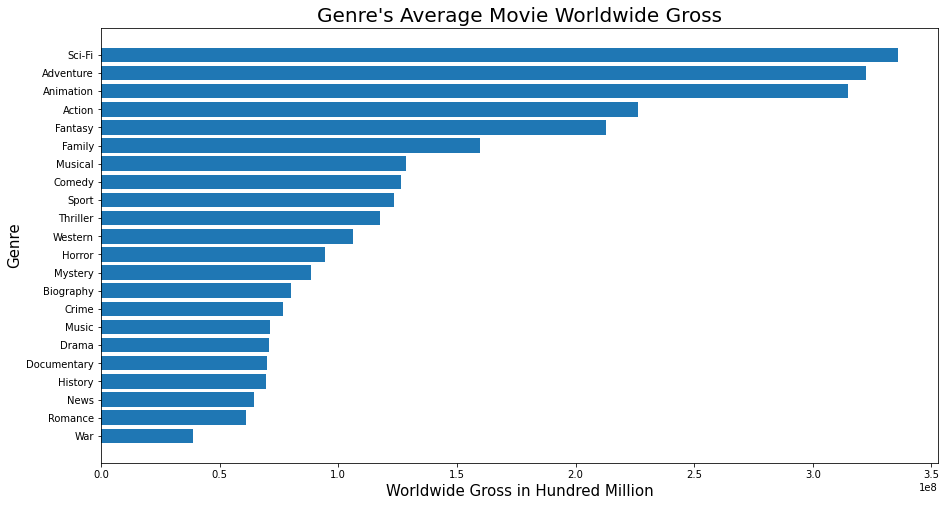

In [44]:
y_pos = np.arange(len(x_values))
plt.figure(figsize = (15,8))
plt.barh(genres_asc_rev[0], genres_asc_rev[1])
plt.ylabel('Genre', fontsize = 15)
plt.xlabel("Worldwide Gross in Hundred Million", fontsize = 15)
plt.title("Genre's Average Movie Worldwide Gross", fontsize = 20)

As you can see from the above graph, Sci-Fi, Adventure, and Animation are the highest grossing genres

After seeing the genre ratings and genre gross, I have decided that they are not relative to each other and am only using the highest grossing genres in my recommendations.

# Highest Grossing Movie Studios

In [66]:
updated_genres_df

,Action,Drama,Thriller,Horror,Mystery,Comedy,History,Biography,Adventure,Romance,...,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,total_gross
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2014,99.0,"Action,Drama,Thriller",7.2,46103,RAtt.,1300000.0,355000.0,2015,1.655000e+06
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2016,103.0,"Drama,Horror,Mystery",7.2,260383,Par.,72100000.0,38100000.0,2016,1.102000e+08
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2018,102.0,"Comedy,Drama",7.5,4802,Sony,1300000.0,10900000.0,2018,1.220000e+07
3,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2011,90.0,"Horror,Mystery,Thriller",4.0,11712,Rocket,32800.0,5700000.0,2011,5.732800e+06
4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2018,130.0,"Action,Drama,History",6.6,50155,WB,45800000.0,21600000.0,2018,6.740000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2014,106.0,"Biography,Drama",6.2,10311,Wein.,724000.0,20300000.0,2014,2.102400e+07
1759,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2012,157.0,"Drama,Thriller",7.4,251072,Sony,95700000.0,37100000.0,2012,1.328000e+08
1760,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,2011,102.0,"Comedy,Family,Romance",5.2,52396,Sony,80400000.0,89500000.0,2011,1.699000e+08
1761,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2016,101.0,Comedy,4.7,59914,Par.,28800000.0,27900000.0,2016,5.670000e+07


In [67]:
#looking at the studios that made the most movies
updated_genres_df['studio'].value_counts().head(10)

Uni.     149
Fox      133
WB       112
BV        90
Par.      84
Sony      83
LGF       76
Wein.     69
Focus     54
FoxS      52
Name: studio, dtype: int64

In [68]:
#creating a function to get the top x studios
def top_x_studios(data, x):
    studios = data['studio'].value_counts().head(x).index.tolist()
    return studios
top_x_studios(updated_genres_df, 10)

['Uni.', 'Fox', 'WB', 'BV', 'Par.', 'Sony', 'LGF', 'Wein.', 'Focus', 'FoxS']

In [69]:
#creating a function to calculate the mean total gross for x studios
def total_mean_gross(list):
    avg = []
    for name in list:
        for value in updated_genres_df[updated_genres_df['studio'] == name][['total_gross', 'studio']].mean():
            avg.append(value)
    return avg
total_mean_gross(top_x_studios(updated_genres_df, 10))

[200590228.18120804,
 228044109.7518797,
 230910741.05357143,
 458347199.98888886,
 208886663.05952382,
 217848801.1686747,
 107712614.4736842,
 57277960.82608695,
 49069037.018518515,
 48925763.461538464]

In [70]:
x_values = top_x_studios(updated_genres_df, 10)
y_values = total_mean_gross(top_x_studios(updated_genres_df, 10))

In [71]:
studios_asc = pd.DataFrame([x_values, y_values]).T
studios_asc.sort_values(1, inplace=True)
studios_asc

,0,1
9,FoxS,4.89258e+07
8,Focus,4.9069e+07
7,Wein.,5.7278e+07
6,LGF,1.07713e+08
0,Uni.,2.0059e+08
4,Par.,2.08887e+08
5,Sony,2.17849e+08
1,Fox,2.28044e+08
2,WB,2.30911e+08
3,BV,4.58347e+08


Text(0.5, 1.0, 'Top 10 Highest Grossing Studios')

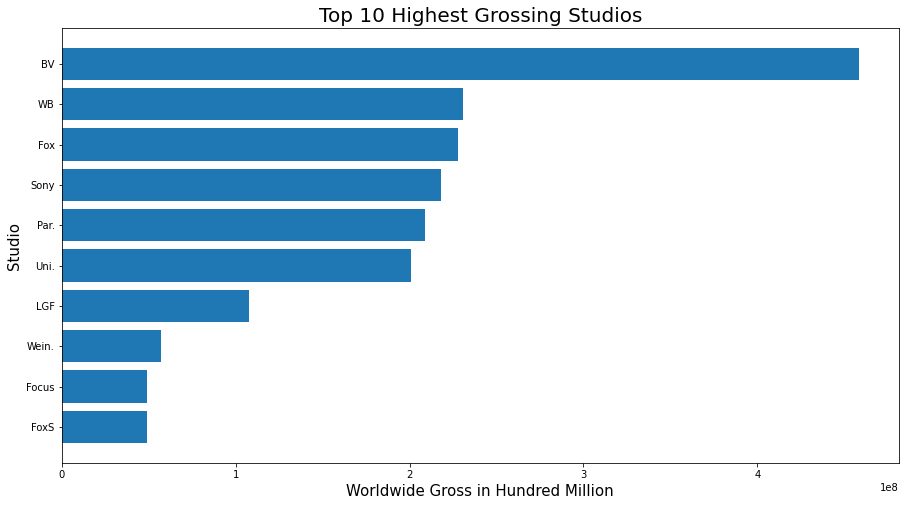

In [72]:
y_pos = np.arange(len(x_values))
plt.figure(figsize = (15,8))
plt.barh(studios_asc[0], studios_asc[1])
plt.ylabel('Studio', fontsize = 15)
plt.xlabel("Worldwide Gross in Hundred Million", fontsize = 15)
plt.title("Top 10 Highest Grossing Studios", fontsize = 20)

As you can see from the above graph, BV, WB, and Fox are the highest grossing movie studios.

# Highest Grossing Directors

In [264]:
#creating dataframes for the names of the crew members to eventually extract the director name
names = pd.read_csv('zippedData/imdb.title.principals.csv.gz')
directors = pd.read_csv('zippedData/imdb.title.crew.csv.gz')
director_name_gross = pd.read_csv('zippedData/imdb.name.basics.csv.gz')

In [265]:
#Doing the merge method since Claude likes this way better than the join method :)
director_df = names.merge(directors, on='tconst')

In [266]:
#naming the merge of the three datasets crew_members since it has all of the information from name to occupation
crew_members = director_df.merge(director_name_gross, on='nconst')
crew_members

,tconst,ordering,nconst,category,job,characters,directors,writers,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]",nm0398271,nm0398271,Tommy Dysart,NaN,NaN,actor,"tt0093120,tt0076974,tt0084296,tt0077064"
1,tt0111414,2,nm0398271,director,NaN,NaN,nm0398271,nm0398271,Frank Howson,1952.0,NaN,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414"
2,tt5573596,5,nm0398271,director,NaN,NaN,nm0398271,nm0398271,Frank Howson,1952.0,NaN,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414"
3,tt0111414,3,nm3739909,producer,producer,NaN,nm0398271,nm0398271,Barry Porter-Robinson,NaN,NaN,"producer,art_department","tt0290884,tt0101374,tt0111414,tt1566940"
4,tt0323808,10,nm0059247,editor,NaN,NaN,nm0362736,nm0362736,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027907,tt9689618,3,nm10439724,actor,NaN,NaN,"nm10439725,nm9652770","nm9652770,nm10439725,nm10439727",Phillippe Warner,NaN,NaN,NaN,NaN
1027908,tt9689618,5,nm10439725,director,NaN,NaN,"nm10439725,nm9652770","nm9652770,nm10439725,nm10439727",Xavi Herrero,NaN,NaN,"director,writer,cinematographer",tt9689618
1027909,tt9692684,3,nm10441594,director,NaN,NaN,nm10441594,nm6009913,Guy Jones,NaN,NaN,director,NaN
1027910,tt9692684,4,nm6009913,writer,writer,NaN,nm10441594,nm6009913,Sabrina Mahfouz,NaN,NaN,writer,"tt5191128,tt3254170,tt2319282,tt8452302"


In [267]:
#merging another dataset into the crew_members one to add the tconst 
all_data = crew_members.merge(df3, on='tconst')
all_data

,tconst,ordering,nconst,category,job,characters,directors,writers,primary_name,birth_year,death_year,primary_profession,known_for_titles,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0323808,10,nm0059247,editor,NaN,NaN,nm0362736,nm0362736,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181",The Wicker Tree,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328
1,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]",nm0362736,nm0362736,Brittania Nicol,NaN,NaN,"actress,soundtrack",tt0323808,The Wicker Tree,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328
2,tt0323808,2,nm2694680,actor,NaN,"[""Steve Thomson""]",nm0362736,nm0362736,Henry Garrett,NaN,NaN,actor,"tt1441953,tt1790885,tt2639254,tt3839822",The Wicker Tree,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328
3,tt0323808,3,nm0574615,actor,NaN,"[""Sir Lachlan Morrison""]",nm0362736,nm0362736,Graham McTavish,1961.0,NaN,"actor,soundtrack,director","tt0462499,tt0903624,tt1477834,tt1170358",The Wicker Tree,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328
4,tt0323808,4,nm0502652,actress,NaN,"[""Lady Delia Morrison""]",nm0362736,nm0362736,Jacqueline Leonard,1967.0,NaN,actress,"tt0088512,tt0106097,tt0103939,tt0241383",The Wicker Tree,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564262,tt7696448,3,nm10313896,self,NaN,"[""Himself""]",nm4300391,NaN,Ish ShaBazz,NaN,NaN,NaN,tt7696448,App: The Human Story,App: The Human Story,2017,70.0,Documentary,8.6,9
564263,tt7696448,4,nm4300391,director,NaN,NaN,nm4300391,NaN,Jake Schumacher,NaN,NaN,"director,sound_department,cinematographer","tt1833217,tt7696448",App: The Human Story,App: The Human Story,2017,70.0,Documentary,8.6,9
564264,tt7696448,5,nm1334745,producer,producer,NaN,nm4300391,NaN,Adam Lisagor,NaN,NaN,"visual_effects,producer,editorial_department","tt0402022,tt0319262,tt0373469,tt0800080",App: The Human Story,App: The Human Story,2017,70.0,Documentary,8.6,9
564265,tt7696448,6,nm9458173,composer,NaN,NaN,nm4300391,NaN,Enoch Kim,NaN,NaN,composer,tt7696448,App: The Human Story,App: The Human Story,2017,70.0,Documentary,8.6,9


In [268]:
#merging yet another set of dataframes
df_gross_director = all_data.set_index('primary_title').join(df.set_index('title'), how='inner').reset_index()
df_gross_director.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17210 entries, 0 to 17209
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               17210 non-null  object 
 1   tconst              17210 non-null  object 
 2   ordering            17210 non-null  int64  
 3   nconst              17210 non-null  object 
 4   category            17210 non-null  object 
 5   job                 6370 non-null   object 
 6   characters          6845 non-null   object 
 7   directors           17202 non-null  object 
 8   writers             16864 non-null  object 
 9   primary_name        17210 non-null  object 
 10  birth_year          10602 non-null  float64
 11  death_year          393 non-null    float64
 12  primary_profession  17126 non-null  object 
 13  known_for_titles    17168 non-null  object 
 14  original_title      17210 non-null  object 
 15  start_year          17210 non-null  int64  
 16  runt

In [269]:
#getting the total gross calculation for directors
df_gross_director['total_gross'] = df_gross_director['domestic_gross'] + df_gross_director['foreign_gross']

In [270]:
#separating the directors out of other strings in primary_profession
df_gross_director['primary_profession'].fillna('').apply(lambda x: 'director' in x)

0        False
1        False
2        False
3        False
4        False
         ...  
17205     True
17206    False
17207    False
17208    False
17209    False
Name: primary_profession, Length: 17210, dtype: bool

In [271]:
#fill in the missing values and only return the director string from the primary_profession column
directors_one = df_gross_director[df_gross_director['primary_profession'].fillna('').apply(lambda x: 'director' in x)]
directors_one

,index,tconst,ordering,nconst,category,job,characters,directors,writers,primary_name,...,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,total_gross
6,'71,tt2614684,5,nm1312919,director,NaN,NaN,nm1312919,nm2954373,Yann Demange,...,2014,99.0,"Action,Drama,Thriller",7.2,46103,RAtt.,1300000.0,355000.0,2015,1.655000e+06
16,10 Cloverfield Lane,tt1179933,5,nm0870469,director,NaN,NaN,nm0870469,"nm1061091,nm1173295,nm3227090",Dan Trachtenberg,...,2016,103.0,"Drama,Horror,Mystery",7.2,260383,Par.,72100000.0,38100000.0,2016,1.102000e+08
19,10 Cloverfield Lane,tt1179933,8,nm3227090,writer,screenplay by,NaN,nm0870469,"nm1061091,nm1173295,nm3227090",Damien Chazelle,...,2016,103.0,"Drama,Horror,Mystery",7.2,260383,Par.,72100000.0,38100000.0,2016,1.102000e+08
21,102 Not Out,tt6580564,10,nm1841544,production_designer,NaN,NaN,nm1084488,nm5030702,Mansi Dhruv Mehta,...,2018,102.0,"Comedy,Drama",7.5,4802,Sony,1300000.0,10900000.0,2018,1.220000e+07
24,102 Not Out,tt6580564,8,nm2590164,cinematographer,NaN,NaN,nm1084488,nm5030702,Laxman Utekar,...,2018,102.0,"Comedy,Drama",7.5,4802,Sony,1300000.0,10900000.0,2018,1.220000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17198,Zoolander 2,tt1608290,10,nm0542802,producer,producer,NaN,nm0001774,"nm0857620,nm0001774,nm0831557,nm0357453,nm0766153",Jeff Mann,...,2016,101.0,Comedy,4.7,59914,Par.,28800000.0,27900000.0,2016,5.670000e+07
17200,Zootopia,tt2948356,6,nm0601781,director,NaN,NaN,"nm1158544,nm0397174,nm0601781","nm0397174,nm0601781,nm1158544,nm0714114,nm2888...",Rich Moore,...,2016,108.0,"Adventure,Animation,Comedy",8.0,383446,BV,341300000.0,682500000.0,2016,1.023800e+09
17202,Zootopia,tt2948356,8,nm0714114,writer,story by,NaN,"nm1158544,nm0397174,nm0601781","nm0397174,nm0601781,nm1158544,nm0714114,nm2888...",Jim Reardon,...,2016,108.0,"Adventure,Animation,Comedy",8.0,383446,BV,341300000.0,682500000.0,2016,1.023800e+09
17203,Zootopia,tt2948356,2,nm0000867,actor,NaN,"[""Nick Wilde""]","nm1158544,nm0397174,nm0601781","nm0397174,nm0601781,nm1158544,nm0714114,nm2888...",Jason Bateman,...,2016,108.0,"Adventure,Animation,Comedy",8.0,383446,BV,341300000.0,682500000.0,2016,1.023800e+09


In [272]:
#finding the top 10 directors who directed the most movies
directors_only = directors_one[directors_one['category'] == 'director']

In [273]:
#directors who made the most films in the dataset
directors_only['primary_name'].value_counts().head(10)

Ridley Scott          7
Steven Spielberg      7
Lasse Hallström       6
Woody Allen           6
Clint Eastwood        6
Steven Soderbergh     5
Jaume Collet-Serra    5
Tim Story             5
Nicholas Stoller      5
Denis Villeneuve      5
Name: primary_name, dtype: int64

In [274]:
#function to create a list of top directors
def top_x_directors(data, x):
    directors = data['primary_name'].value_counts().head(x).index
    return directors
x_values = top_x_directors(directors_only, 10)

In [275]:
#function to calculate the average total gross for each director
def mean_gross(list):
    avg = []
    for name in list:
        for value in directors_only[directors_only['primary_name'] == name][['total_gross', 'primary_name']].mean():
            avg.append(value)
    return avg
y_values = mean_gross(top_x_directors(directors_only, 10))

In [276]:
#double checking to see if there is any missing data
directors_only['total_gross'].isna().any()

False

In [277]:
directors_only['total_gross'].mean()

131038882.76544623

In [278]:
directors_asc = pd.DataFrame([x_values, y_values]).T
directors_asc.sort_values(1, inplace=True)
directors_asc

,0,1
3,Woody Allen,6.285e+07
5,Steven Soderbergh,7.976e+07
7,Tim Story,9.54948e+07
2,Lasse Hallström,1.19133e+08
6,Jaume Collet-Serra,1.3286e+08
9,Denis Villeneuve,1.346e+08
8,Nicholas Stoller,1.4148e+08
4,Clint Eastwood,1.83833e+08
1,Steven Spielberg,2.76929e+08
0,Ridley Scott,2.84614e+08


In [279]:
x_values = top_x_directors(directors_only, 10)
y_values = mean_gross(top_x_directors(directors_only, 10))

Text(0.5, 1.0, 'Top 10 Highest Grossing Directors')

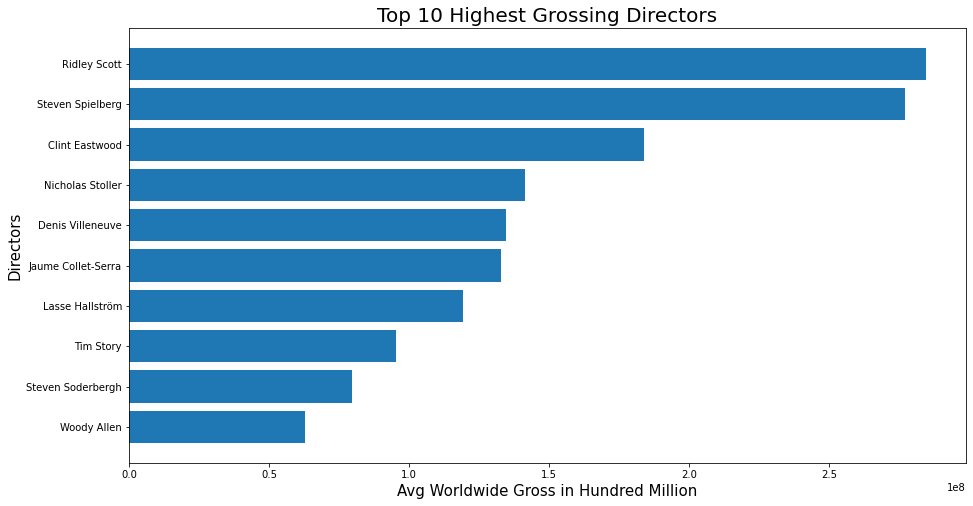

In [280]:
plt.figure(figsize = (15,8))
plt.barh(directors_asc[0], directors_asc[1])
plt.ylabel('Directors', fontsize = 15)
plt.xlabel("Avg Worldwide Gross in Hundred Million", fontsize = 15)
plt.title("Top 10 Highest Grossing Directors", fontsize = 20)

As you can see from the above graph, the top two highest grossing directors are Ridley Scott and Steven Spielberg

# Conclusion

Based on the findings throughout the data sets, I propose the three business recommendations:

1. Make movies that are Sci-Fi, Adventure, or Animation as they are the top genres that produce the most revenue.
2. Study the target audience for the top movie studios BV, WB, and Fox. By studying the behavior/trends of consumers, we can capture their data on television rights, videos-on-demand, and streaming services.
3. Hire Ridley Scott or Steven Spielberg to direct movies since they bring in the most revenue.


## Features to Explore

1. Movie Budget
2. ROI
3. Date Movie is Released
4. Target Audients

